## HW4

For this assignment, I used the MovieLens Small Dataset, which contains user ratings for various movies. One set of nodes represents users and the other represents movies, with edges showing the ratings users have given.

In [ ]:
import pandas as pd
import zipfile
import urllib.request
import os

url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
urllib.request.urlretrieve(url, "ml-latest-small.zip")

with zipfile.ZipFile("ml-latest-small.zip", "r") as zip_ref:
    zip_ref.extractall(".")

extracted_dir = None
for name in os.listdir("."):
    if name.startswith("ml-latest-small"):
        extracted_dir = name
        break

ratings = pd.read_csv(os.path.join(extracted_dir, "ratings.csv"))
movies = pd.read_csv(os.path.join(extracted_dir, "movies.csv"))

print(ratings.head())
print(movies.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


graph: 9811 nodes, 100403 edges
island graph: 6473 nodes, 48329 edges


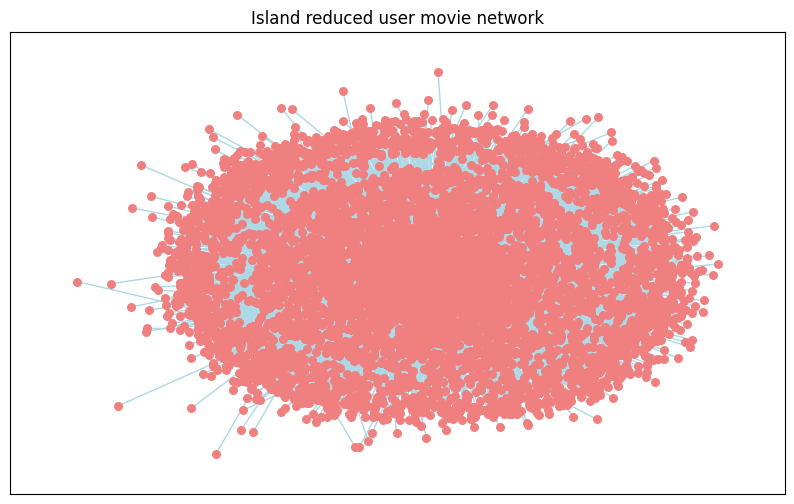

In [8]:
import networkx as nx

#creating bipartite graph (users and movies)
B = nx.Graph()
B.add_nodes_from(ratings["userId"].unique(), bipartite=0, label="user")
B.add_nodes_from(ratings["movieId"].unique(), bipartite=1, label="movie")


#edges with weight = rating
for _, row in ratings.iterrows():
    B.add_edge(row["userId"], row["movieId"], weight=row["rating"])

print(f"graph: {B.number_of_nodes()} nodes, {B.number_of_edges()} edges")

#island method"
threshold = 4.0
B_island = nx.Graph([(u, v, d) for u, v, d in B.edges(data=True) if d["weight"] >= threshold])

print(f"island graph: {B_island.number_of_nodes()} nodes, {B_island.number_of_edges()} edges")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(B_island, seed=42)
nx.draw_networkx(
    B_island,
    pos,
    node_size=30,
    edge_color="lightblue",
    node_color="lightcoral",
    with_labels=False,
)
plt.title("Island reduced user movie network")
plt.show()


In the island reduced bipartite network, there are two distinct groups: users and movies.

The users represent individuals who rated movies, while the movies represent the items being rated.

After applying the island method (keeping only ratings ≥ 4), the remaining connections only represent users who really liked certain movies.

The user group forms clusters around movies they all rated highly, which reveales shared movie taste or similar viewing patterns.

The movie group shows which films attracted similar audiences, showing users with common preferences.

Overall, it seems to suggeste many users overlap in the movies they rate positively.